# Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

import wrangle as w

np.random.seed(123)

import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [13]:
df = w.wrangle_zillow()

In [14]:
df.head()

AttributeError: 'tuple' object has no attribute 'head'

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [7]:
train, validate, test = w.train_val_test(df)

AttributeError: module 'wrangle' has no attribute 'train_val_test'

In [5]:
train.shape, validate.shape, test.shape

((1070117, 7), (642070, 7), (428048, 7))

In [6]:
mm_scaler = MinMaxScaler()

In [7]:
mm_scaler.fit(train[['bedrooms']])

MinMaxScaler()

In [8]:
mm_train = mm_scaler.transform(train[['bedrooms']])

(array([1.35870e+04, 6.48973e+05, 3.91856e+05, 1.49020e+04, 5.59000e+02,
        2.04000e+02, 2.10000e+01, 1.00000e+01, 4.00000e+00, 1.00000e+00]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

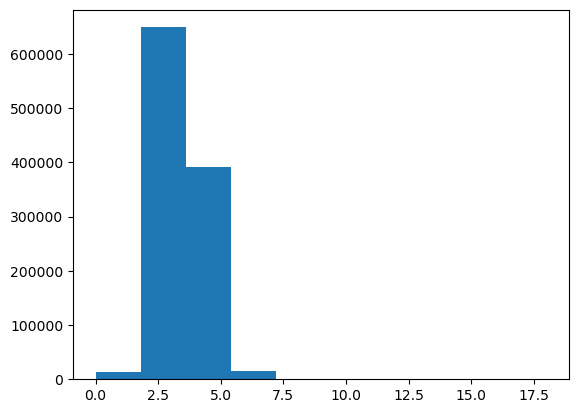

In [9]:
plt.hist(train['bedrooms'])

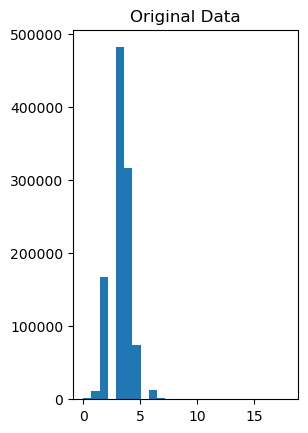

Text(0.5, 1.0, 'Transformed Data')

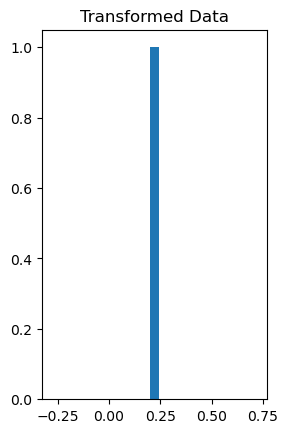

In [10]:
plt.subplot(121)
plt.hist(train['bedrooms'], bins=25)
plt.title('Original Data')
plt.show()
    
plt.subplot(122)
plt.hist(mm_train[0], bins=25)
plt.title('Transformed Data')

In [17]:
to_scale = ['bedrooms', 'bathrooms', 'square_ft', 'taxamount']

In [12]:
s_scaler = StandardScaler()

In [13]:
ss_scaled = train.copy()

In [14]:
ss_scaled[to_scale] = s_scaler.fit_transform(train[to_scale])

In [15]:
ss_scaled

,bedrooms,bathrooms,square_ft,tax_value,built,taxamount,fips
128027,0.750391,0.263455,0.098383,430183,2001,0.162515,6059
1234330,0.750391,1.778170,1.909529,2049303,1997,2.424286,6037
73824,0.750391,0.263455,-0.028286,654244,1994,0.113027,6059
952918,-1.396329,-1.251261,-0.763801,337000,1948,-0.168858,6111
422436,-0.322969,-1.251261,-0.385196,281172,1953,-0.256315,6037
...,...,...,...,...,...,...,...
2003274,-0.322969,-0.241451,-0.406891,297096,1988,-0.149950,6037
1570006,0.750391,-0.241451,-0.162652,179979,1949,-0.400266,6037
732180,-0.322969,0.768360,-0.241732,735768,1948,0.363718,6037
110268,-1.396329,-1.251261,-0.330610,788601,1922,0.499571,6037


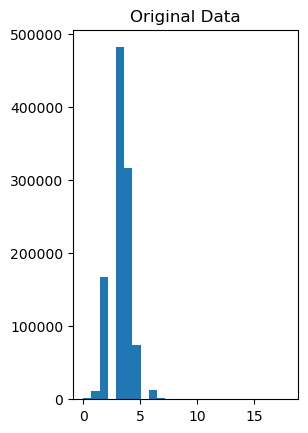

Text(0.5, 1.0, 'Transformed Data')

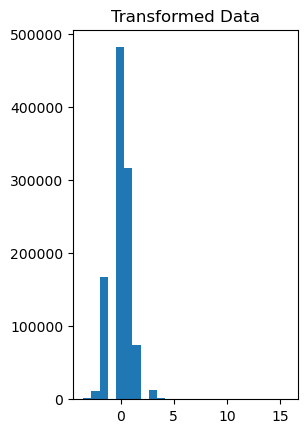

In [16]:
plt.subplot(121)
plt.hist(train['bedrooms'], bins=25)
plt.title('Original Data')
plt.show()
    
plt.subplot(122)
plt.hist(ss_scaled['bedrooms'], bins=25)
plt.title('Transformed Data')

In [14]:
r_scaler = RobustScaler()

In [15]:
r_scaled = train.copy()

In [18]:
r_scaled[to_scale] = r_scaler.fit_transform(train[to_scale])

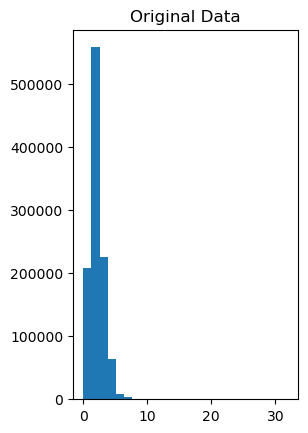

Text(0.5, 1.0, 'Transformed Data')

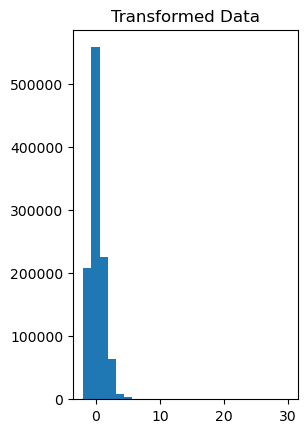

In [83]:
plt.subplot(121)
plt.hist(train['bathrooms'], bins=25)
plt.title('Original Data')
plt.show()
    
plt.subplot(122)
plt.hist(r_scaled['bathrooms'], bins=25)
plt.title('Transformed Data')

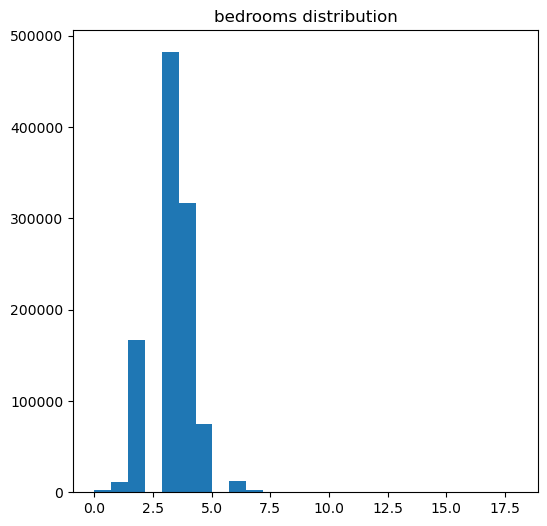

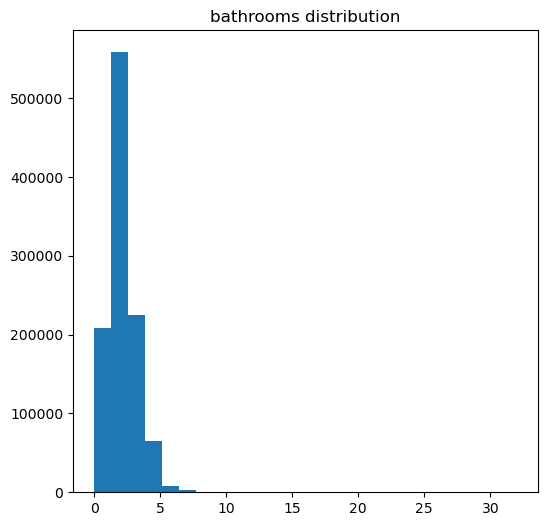

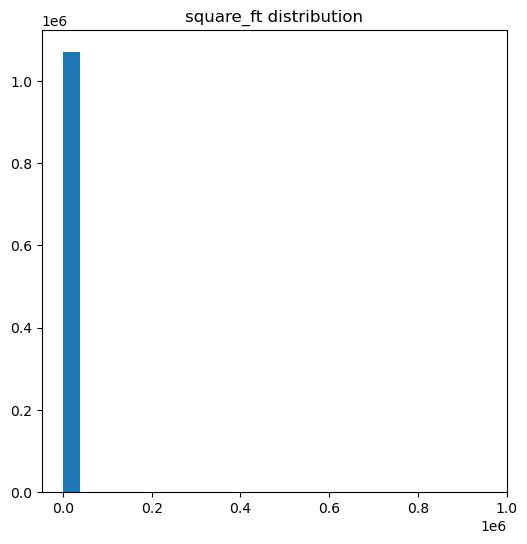

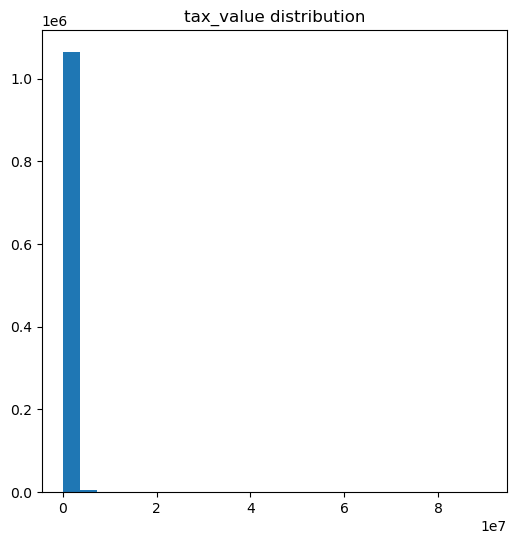

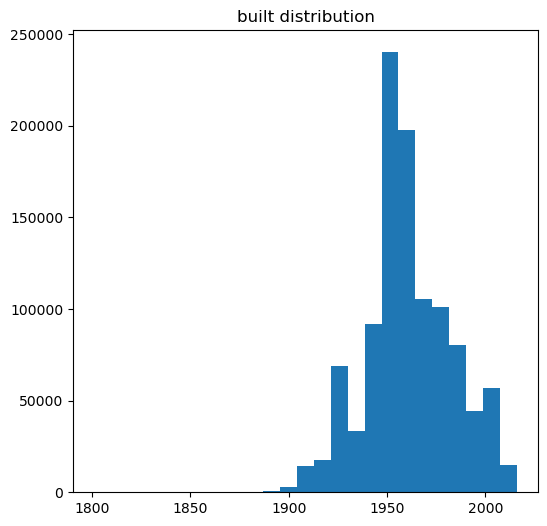

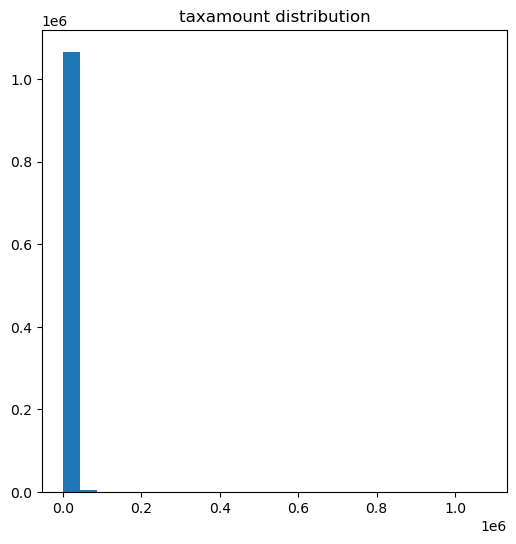

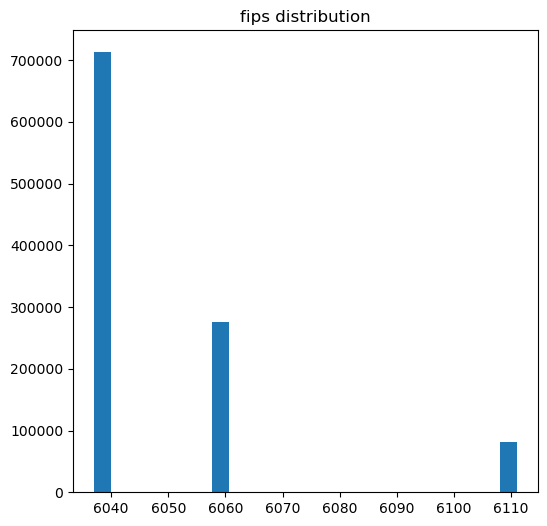

In [28]:
for col in train.columns:
    
    plt.figure(figsize=(6, 6))
    plt.hist(train[col], bins=25)
    plt.title(f'{col} distribution')
    plt.show()

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [27]:
r_scaled

,bedrooms,bathrooms,square_ft,tax_value,built,taxamount,fips
128027,1.0,0.5,0.401475,430183,2001,0.722078,6059
1234330,1.0,2.0,3.128556,2049303,1997,5.347454,6037
73824,1.0,0.5,0.210748,654244,1994,0.620876,6059
952918,-1.0,-1.0,-0.896733,337000,1948,0.044414,6111
422436,0.0,-1.0,-0.326660,281172,1953,-0.134438,6037
...,...,...,...,...,...,...,...
2003274,0.0,0.0,-0.359326,297096,1988,0.083081,6037
1570006,1.0,0.0,0.008430,179979,1949,-0.428822,6037
732180,0.0,1.0,-0.110643,735768,1948,1.133545,6037
110268,-1.0,-1.0,-0.244468,788601,1922,1.411366,6037


In [ ]:
rs_inverse = rs_scaler.inverse_transform(train[['tax_value']])

In [30]:
r_scaler.inverse_transform([[r_scaled)

ValueError: operands could not be broadcast together with shapes (1070117,7) (4,) (1070117,7) 

In [ ]:
taxes_adjusted = taxes[taxes.between(taxes.quantile(.05), taxes.quantile(.95))]

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [35]:
to_scale = ['bedrooms']

In [41]:
q_scaler = QuantileTransformer(output_distribution='normal')

In [42]:
q_scaled = train.copy()

In [43]:
q_scaled[to_scale] = q_scaler.fit_transform(train[to_scale])

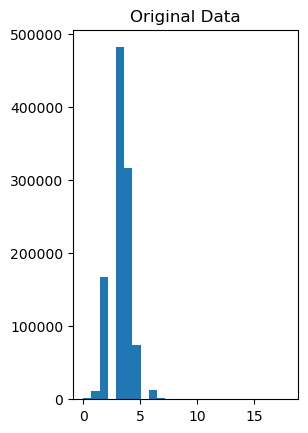

Text(0.5, 1.0, 'Transformed Data')

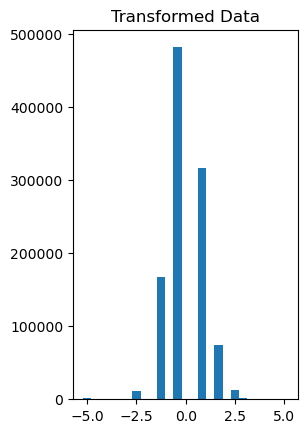

In [44]:
plt.subplot(121)
plt.hist(train['bedrooms'], bins=25)
plt.title('Original Data')
plt.show()
    
plt.subplot(122)
plt.hist(q_scaled['bedrooms'], bins=25)
plt.title('Transformed Data')

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


In [45]:
to_scale = ['bedrooms']
qo_scaler = QuantileTransformer()
qo_scaled = train.copy()
qo_scaled[to_scale] = qo_scaler.fit_transform(train[to_scale])

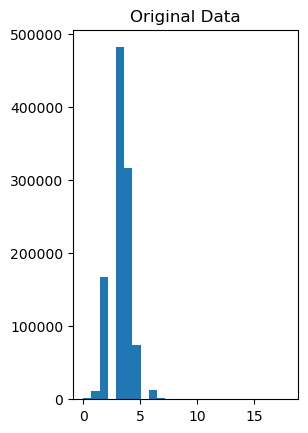

Text(0.5, 1.0, 'Transformed Data')

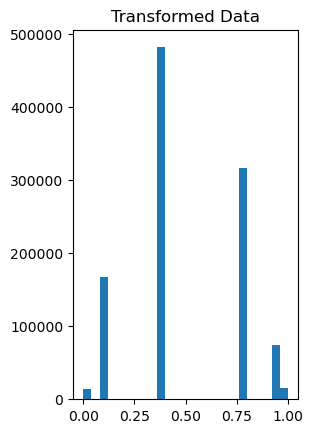

In [46]:
plt.subplot(121)
plt.hist(train['bedrooms'], bins=25)
plt.title('Original Data')
plt.show()
    
plt.subplot(122)
plt.hist(qo_scaled['bedrooms'], bins=25)
plt.title('Transformed Data')

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!


In [22]:
def robust_scaler(X_train, X_validate, X_test):
    
    seed = 42
    X_train, y_train, X_validate, y_validate, X_test, y_test = xy_subsets(train, validate, test)
    
    r_scaler = RobustScaler()
    r_scaler.fit(X_train)
    
    X_train_scaled = r_scaler.transform(X_train)
    X_validate_scaled = r_scaler.transform(X_validate)
    X_test_scaled = r_scaler.transform(X_test)
    
    return X_train_scaled, X_validate_scaled, X_test_scaled
    

In [23]:
X_train, y_train, X_validate, y_validate, X_test, y_test = mod––––eling.xy_subsets(train, validate, test)

In [24]:
X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((1070117, 6), (1070117,), (642070, 6), (642070,), (428048, 6), (428048,))

In [27]:
X_train_scaled, X_validate_scaled, X_test_scaled = robust_scaler(X_train, X_validate, X_test)

In [32]:
X_train_scaled[:1]

array([[1.        , 0.5       , 0.40147524, 1.65384615, 0.72207818,
        1.        ]])